# US Real GDP and its Composition by Industry

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from pandas.tseries.offsets import BDay
from dateutil.relativedelta import relativedelta
from datetime import date

In [3]:
report_start = date.fromisoformat('1969-01-01')
report_end = date.today()

In [4]:
real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

# Convert to annual percentage changes
real_gdp = real_gdp.pct_change(4, fill_method='bfill')

# Rename and add a moving average
real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)
real_gdp['Real GDP Moving Avg (4Q)'] = real_gdp.iloc[:,0].rolling(4).mean()

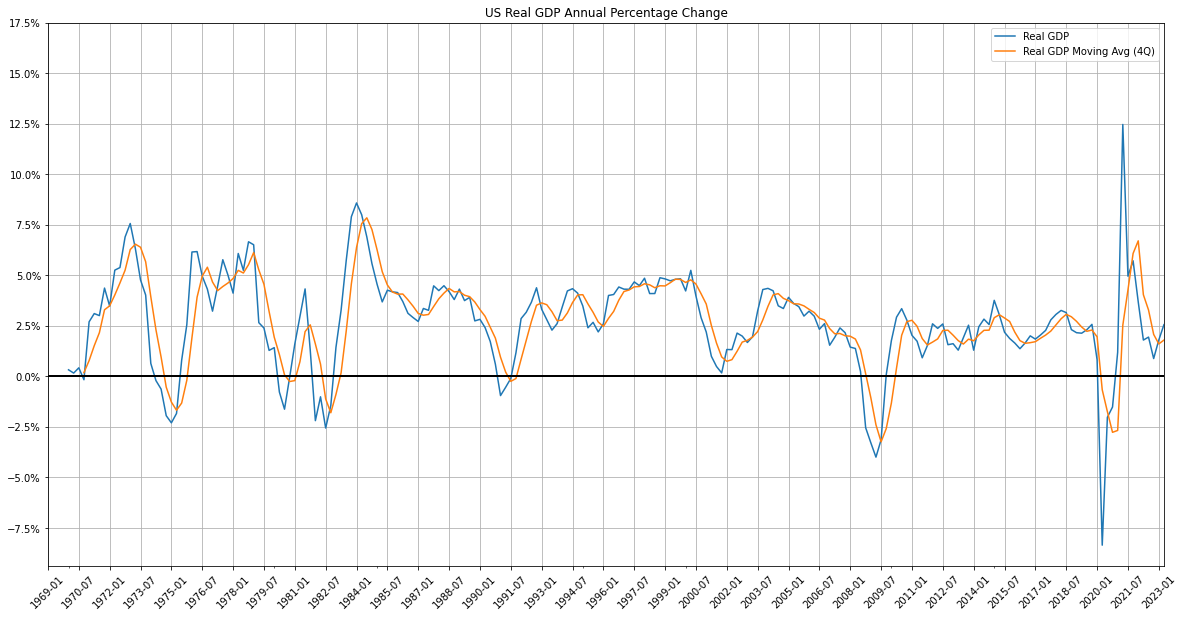

In [5]:
ax = real_gdp.plot(figsize=(20,10), grid=True, title='US Real GDP Annual Percentage Change',
                   xticks=real_gdp.index[::6], xlabel='', rot=45, yticks=np.arange(-.075, .2, 0.025))
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, real_gdp.index[::6])))

## Composition of US GDP
In this section of the notebook I look at the real value added (represents the sum of the costs-incurred and the incomes-earned in production, and consists of compensation of employees, taxes on production and imports, less subsidies, and gross operating surplus) for each constituent industry of US GDP and how it changed over the past 5 and 10 years.

Real value added measurements are in Billions of Chained 2012 Dollars

In [6]:
gdp_components = web.get_data_fred(['RVAAFH', 'RVAM', 'RVAU', 'RVAC', 'RVAMA', 'RVAW', 'RVAR', 'RVAT',
                                    'RVAI', 'RVAFI', 'RVARL', 'RVAPBS', 'RVAESHS', 'RVAAERAF',
                                    'RVAOSEG', 'RVAG', 'RVAAI'], start=report_start, end=report_end)

In [7]:
GDP_AFH_COLUMN_NAME = 'Agriculture, Forestry, Fishing, and Hunting'
GDP_M_COLUMN_NAME = 'Mining'
GDP_U_COLUMN_NAME = 'Utilities'
GDP_C_COLUMN_NAME = 'Construction'
GDP_MA_COLUMN_NAME = 'Manufacturing'
GDP_W_COLUMN_NAME = 'Wholesale Trade'
GDP_R_COLUMN_NAME = 'Retail Trade'
GDP_T_COLUMN_NAME = 'Transportation and Warehousing'
GDP_I_COLUMN_NAME = 'Information Technology and Telecom'
GDP_FI_COLUMN_NAME = 'Finance and Insurance'
GDP_RL_COLUMN_NAME = 'Real Estate, Rental, and Leasing'
GDP_PBS_COLUMN_NAME = 'Professional and Business Services'
GDP_ESHS_COLUMN_NAME = 'Education, Health Care, and Social Assist.'
GDP_AERAF_COLUMN_NAME = 'Arts, Entert., Recreat., Accom., and Food Services'
GDP_OSEG_COLUMN_NAME = 'Other Services'
GDP_G_COLUMN_NAME = 'Government'
GRAPH_TITLE_GDP_COMPONENTS = 'Composition of US GDP By Value Added'
GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG = 'Percentage Change in Value Added by Each Component of US GDP'
gdp_components.rename(
    columns={'RVAAFH': GDP_AFH_COLUMN_NAME, 'RVAM': GDP_M_COLUMN_NAME,
             'RVAU': GDP_U_COLUMN_NAME, 'RVAC': GDP_C_COLUMN_NAME,
             'RVAMA': GDP_MA_COLUMN_NAME, 'RVAW': GDP_W_COLUMN_NAME,
             'RVAR': GDP_R_COLUMN_NAME, 'RVAT': GDP_T_COLUMN_NAME,
             'RVAI': GDP_I_COLUMN_NAME, 'RVAFI': GDP_FI_COLUMN_NAME,
             'RVARL': GDP_RL_COLUMN_NAME, 'RVAPBS': GDP_PBS_COLUMN_NAME,
             'RVAESHS': GDP_ESHS_COLUMN_NAME, 'RVAAERAF': GDP_AERAF_COLUMN_NAME,
             'RVAOSEG': GDP_OSEG_COLUMN_NAME, 'RVAG': GDP_G_COLUMN_NAME},
    inplace=True)

gdp_total = gdp_components.iloc[:,-1]
gdp_components = gdp_components.iloc[:,:-1]

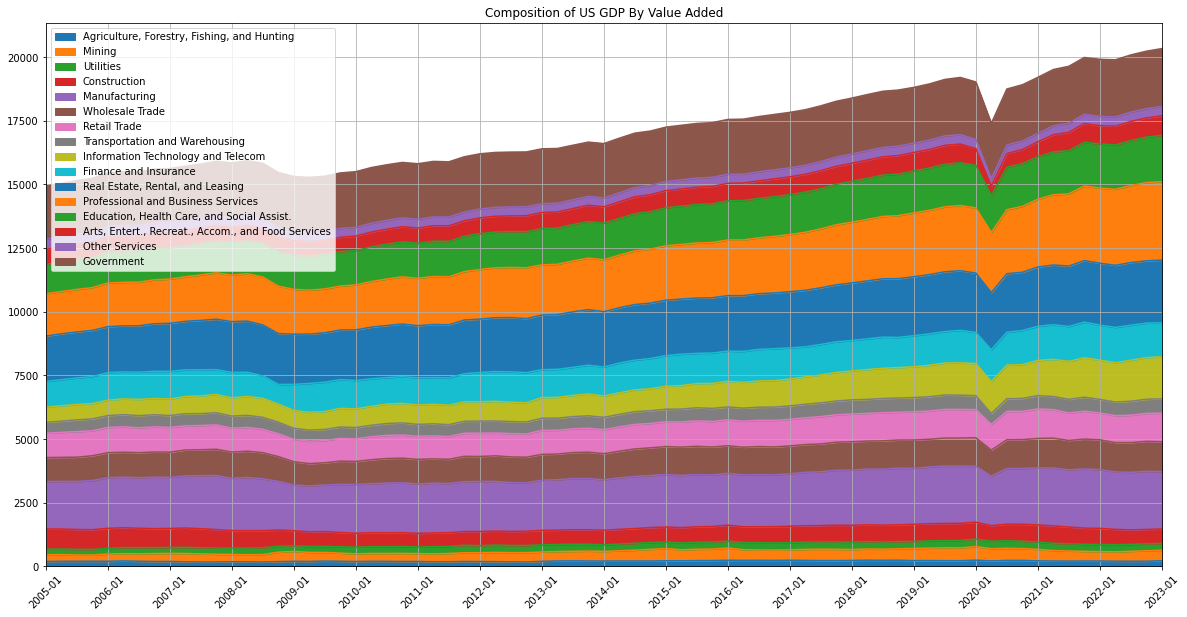

In [8]:
ax = gdp_components.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components.index[::4], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components.index[::4])))

In [9]:
# Converting to percentages by dividing by total
gdp_components_pct = gdp_components.divide(gdp_components.sum(axis=1), axis=0)

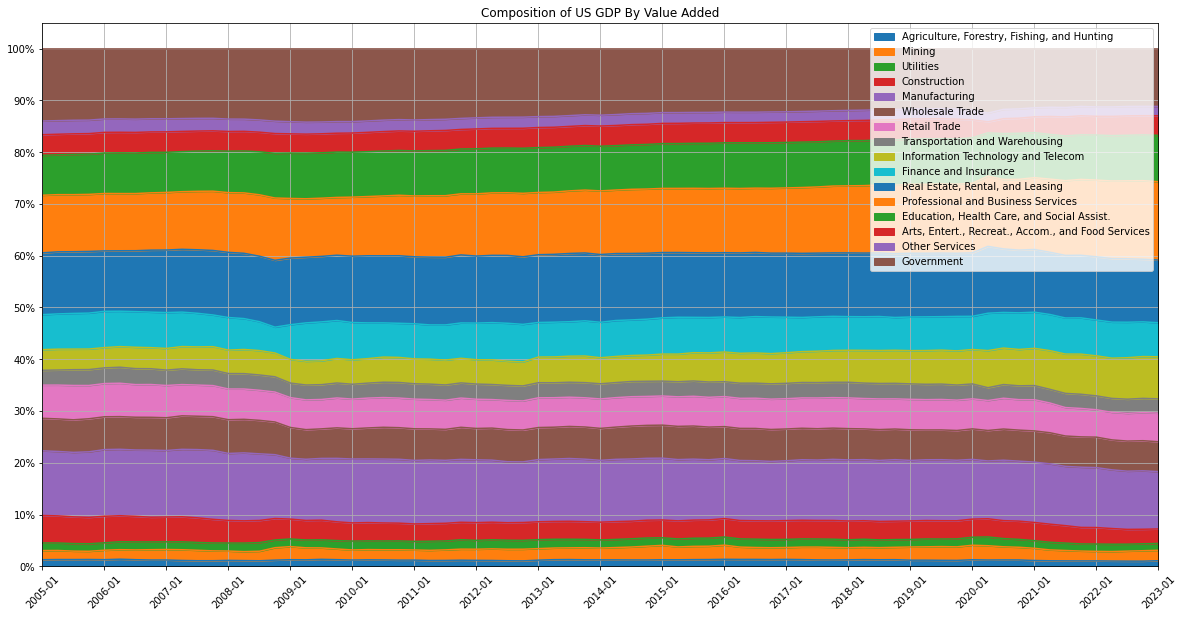

In [10]:
ax = gdp_components_pct.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components_pct.index[::4], xlabel='', rot=45,
                              yticks=np.arange(0, 1.01, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components_pct.index[::4])))

### Percentage Changes in Value Added by Each Industry of US GDP

In [11]:
periods = [10, 5]
gdp_components_pct_chg = pd.concat(
    [((gdp_components - gdp_components.shift(4*period)).divide(gdp_total.shift(4*period), axis=0)).iloc[-1] for period in periods],
                                    axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

In [12]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], inplace=True)

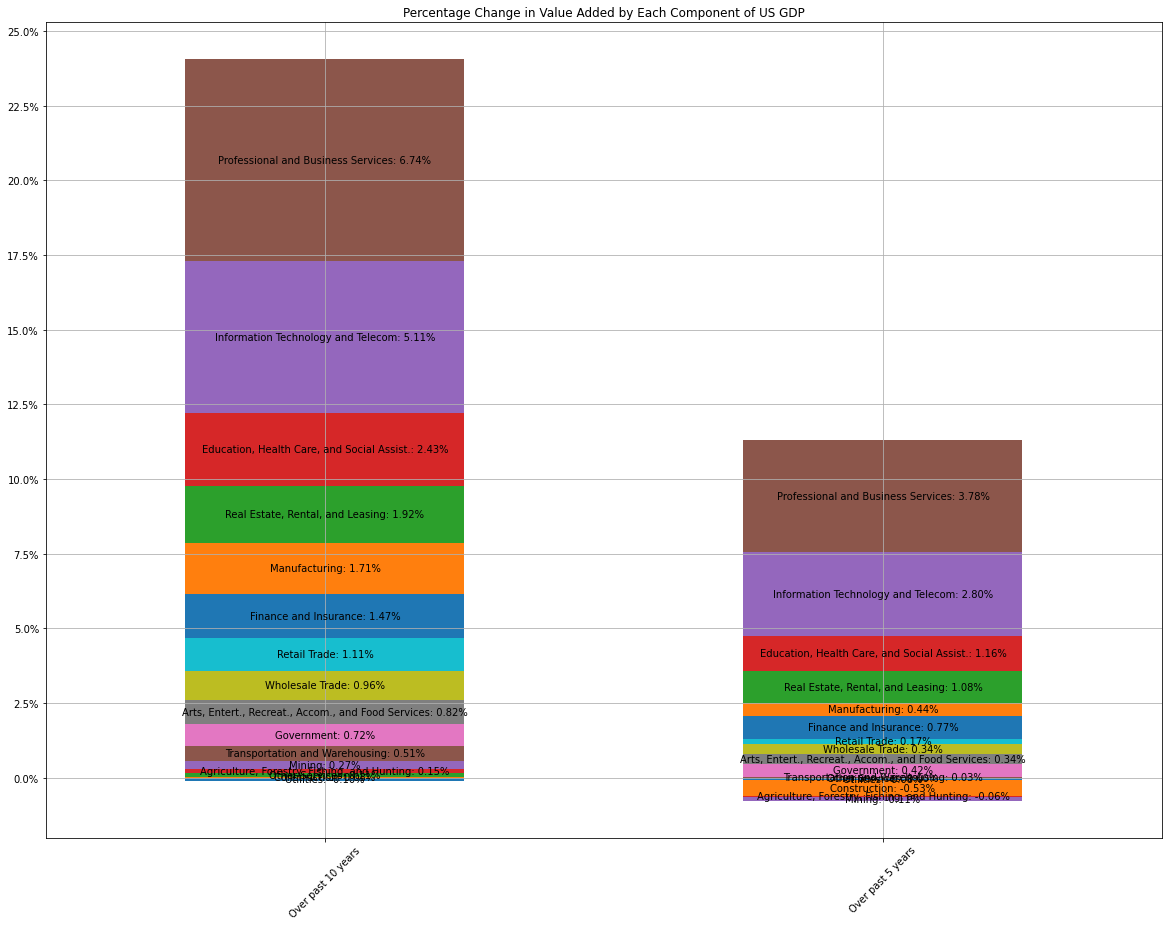

In [13]:
ax = gdp_components_pct_chg.T.plot.bar(figsize=(20,15), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG,
                                       stacked=True, rot=45, yticks=np.arange(0, 0.26, .025))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

In [29]:
gdp_total_pct_chg = pd.DataFrame([gdp_total.pct_change(4*period).iloc[-1] for period in periods], 
                                 index=['Over past {:d} years'.format(period) for period in periods],
                                 columns=['Percentage Change'])

In [30]:
gdp_total_pct_chg

,Percentage Change
Over past 10 years,0.233634
Over past 5 years,0.100108
